### JEC4_classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
def tanh(Z):
    A_i = np.tanh(Z)
    return A_i
def df_tanh(A_i):
    df_A_i = 1-A_i**2
    return df_A_i
data = pd.read_excel("traindata_classification.xlsx")
data

,n0,s10,s20,s30,m10,m20,m30,l10,l20,l30,...,rx4991,rx4992,rx4993,rx4994,rx4995,rx4996,rx4997,rx4998,rx4999,rx5000
0,0,0,0,0,0,0,0,1,0,0,...,-0.032219,-0.032094,-0.032000,-0.031844,-0.031719,-0.031625,-0.031500,-0.031406,-0.031344,-0.031281
1,0,0,0,0,0,0,0,1,0,0,...,-0.027563,-0.028188,-0.028844,-0.029469,-0.030125,-0.030781,-0.031375,-0.032000,-0.032531,-0.033031
2,0,0,0,0,0,0,0,1,0,0,...,-0.037625,-0.037125,-0.036625,-0.036125,-0.035594,-0.035063,-0.034563,-0.034063,-0.033563,-0.033125
3,0,0,0,0,0,0,0,1,0,0,...,-0.030625,-0.031313,-0.031875,-0.032281,-0.032594,-0.032719,-0.032656,-0.032406,-0.032000,-0.031344
4,0,0,0,0,0,0,0,1,0,0,...,-0.033625,-0.033469,-0.033281,-0.033031,-0.032719,-0.032375,-0.032000,-0.031594,-0.031156,-0.030656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,1,0,0,0,0,0,0,...,-0.026906,-0.026375,-0.025844,-0.025375,-0.024969,-0.024594,-0.024313,-0.024125,-0.024000,-0.023969
1096,0,0,0,1,0,0,0,0,0,0,...,-0.039813,-0.039625,-0.039406,-0.039188,-0.038937,-0.038656,-0.038375,-0.038062,-0.037719,-0.037344
1097,0,0,0,1,0,0,0,0,0,0,...,-0.039719,-0.038594,-0.037469,-0.036344,-0.035219,-0.034125,-0.033031,-0.032000,-0.030969,-0.030031
1098,0,0,0,1,0,0,0,0,0,0,...,-0.022500,-0.022625,-0.022906,-0.023375,-0.024000,-0.024813,-0.025781,-0.026906,-0.028125,-0.029500


In [2]:
dataM = data.values
dataM.shape

(1100, 5011)

In [3]:
N = dataM.shape[0]
N

1100

In [4]:
D = dataM.shape[1]-5000
D

11

In [5]:
X = dataM[:,D:]
X

array([[-0.032     , -0.03084375, -0.02971875, ..., -0.03140625,
        -0.03134375, -0.03128125],
       [-0.02090625, -0.02009375, -0.01940625, ..., -0.032     ,
        -0.03253125, -0.03303125],
       [-0.019     , -0.0174375 , -0.016     , ..., -0.0340625 ,
        -0.0335625 , -0.033125  ],
       ...,
       [-0.04725   , -0.04675   , -0.046125  , ..., -0.032     ,
        -0.03096875, -0.03003125],
       [-0.0379375 , -0.03871875, -0.0394375 , ..., -0.02690625,
        -0.028125  , -0.0295    ],
       [-0.04009375, -0.0411875 , -0.04228125, ..., -0.0333125 ,
        -0.0338125 , -0.03440625]])

In [6]:
Y = dataM[:,:D]
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X_min = X.min(axis=1).reshape(N,1)
X_max = X.max(axis=1).reshape(N,1)
X_norm = (X-X_min)/(X_max-X_min) #normalize
X_norm

array([[0.51312901, 0.51469098, 0.51621074, ..., 0.5139311 , 0.51401554,
        0.51409997],
       [0.51190637, 0.51307675, 0.51406707, ..., 0.49592618, 0.49516093,
        0.49444069],
       [0.52312984, 0.52527945, 0.52725709, ..., 0.50240757, 0.50309544,
        0.50369733],
       ...,
       [0.45439788, 0.45535983, 0.45656226, ..., 0.48373715, 0.48572116,
        0.4875248 ],
       [0.50656919, 0.50524476, 0.50402628, ..., 0.52527018, 0.52320407,
        0.52087307],
       [0.49038964, 0.48835724, 0.48632484, ..., 0.50299053, 0.50206144,
        0.50095813]])

In [8]:
Y_min = Y.min(axis=0)
Y_max = Y.max(axis=0)
Y_norm = (Y-Y_min)/(Y_max-Y_min)
Y_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
epoch = 50000
hln1 = 250
hln2 = 250
hln3 = 250
hln4 = 250
hln5 = 250
W1 = np.random.randn(5000,hln1)
B1 = np.random.randn(1,hln1)
W2 = np.random.randn(hln1,hln2)
B2 = np.random.randn(1,hln2)
W3 = np.random.randn(hln2,hln3)
B3 = np.random.randn(1,hln3)
W4 = np.random.randn(hln3,hln4)
B4 = np.random.randn(1,hln4)
W5 = np.random.randn(hln4,hln5)
B5 = np.random.randn(1,hln5)
W6 = np.random.randn(hln5,11)
B6 = np.random.randn(1,11)
lr = 0.01
error_list = []
for i in range(epoch): 
    Z1 = np.dot(X_norm,W1)+B1
    A1 = tanh(Z1)
    dfA1 = df_tanh(A1)
    Z2 = np.dot(A1,W2)+B2 
    A2 = tanh(Z2)
    dfA2 = df_tanh(A2)
    Z3 = np.dot(A2,W3)+B3 
    A3 = tanh(Z3)
    dfA3 = df_tanh(A3)
    Z4 = np.dot(A3,W4)+B4 
    A4 = tanh(Z4)
    dfA4 = df_tanh(A4)
    Z5 = np.dot(A4,W5)+B5
    A5 = tanh(Z5)
    dfA5 = df_tanh(A5)
    Z6 = np.dot(A5,W6)+B6
    Z_sof = np.exp(Z6)/np.exp(Z6).sum(axis=1,keepdims=True) #softmax function #feed forward
    cerror = (-Y_norm*np.log(Z_sof)).sum()/Y.size #cross entropy loss
    error_list.append(cerror)
    error6 = Y_norm-Z_sof 
    W6 = W6+(lr/N)*np.dot(A5.T,error6)
    B6 = B6+(lr/N)*np.dot(1,error6).sum(axis=0,keepdims=True) #gradient descent
    error5 = (np.dot(error6,W6.T))*dfA5 #back propagation
    W5 = W5+(lr/N)*np.dot(A4.T,error5)
    B5 = B5+(lr/N)*np.dot(1,error5).sum(axis=0,keepdims=True)
    error4 = (np.dot(error5,W5.T))*dfA4
    W4 = W4+(lr/N)*np.dot(A3.T,error4)
    B4 = B4+(lr/N)*np.dot(1,error4).sum(axis=0,keepdims=True)
    error3 = (np.dot(error4,W4.T))*dfA3
    W3 = W3+(lr/N)*np.dot(A2.T,error3)
    B3 = B3+(lr/N)*np.dot(1,error3).sum(axis=0,keepdims=True)
    error2 = (np.dot(error3,W3.T))*dfA2
    W2 = W2+(lr/N)*np.dot(A1.T,error2)
    B2 = B2+(lr/N)*np.dot(1,error2).sum(axis=0,keepdims=True)
    error1 = (np.dot(error2,W2.T))*dfA1 
    W1 = W1+(lr/N)*np.dot(X_norm.T,error1)
    B1 = B1+(lr/N)*np.dot(1,error1).sum(axis=0,keepdims=True) #backward
Z1 = np.dot(X_norm,W1)+B1
A1 = tanh(Z1)
Z2 = np.dot(A1,W2)+B2
A2 = tanh(Z2)
Z3 = np.dot(A2,W3)+B3
A3 = tanh(Z3)
Z4 = np.dot(A3,W4)+B4
A4 = tanh(Z4)
Z5 = np.dot(A4,W5)+B5
A5 = tanh(Z5)
Z6 = np.dot(A5,W6)+B6
Z_sof = np.exp(Z6)/np.exp(Z6).sum(axis=1,keepdims=True)
cerror = (-Y_norm*np.log(Z_sof)).sum()/Y.size
error_list.append(cerror)
Z_norm = Z_sof==Z_sof.max(axis=1).reshape(N,1)
Z = Z_norm*(Y_max-Y_min)+Y_min #denormalize
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

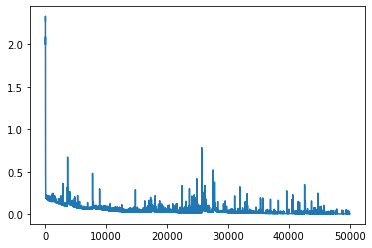

In [10]:
plt.plot(error_list[0:100000])

In [11]:
Y_result = np.argmax(Y,axis=1).reshape(N,1)
Z_result = np.argmax(Z,axis=1).reshape(N,1)
np.concatenate((Y_result,Z_result),axis=1)

array([[7, 7],
       [7, 7],
       [7, 7],
       ...,
       [3, 3],
       [3, 3],
       [3, 3]], dtype=int64)

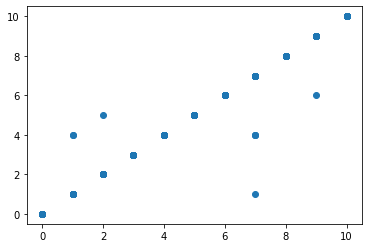

In [12]:
plt.scatter(Y_result,Z_result)

In [13]:
Z_resultc = []
for j in range(N):
    if Z_result[j]==0:
        Z_resultc.append('no_object')
    elif Z_result[j]==1:
        Z_resultc.append('small10cm')
    elif Z_result[j]==2:
        Z_resultc.append('small20cm')
    elif Z_result[j]==3:
        Z_resultc.append('small30cm')
    elif Z_result[j]==4:
        Z_resultc.append('medium10cm')
    elif Z_result[j]==5:
        Z_resultc.append('medium20cm')
    elif Z_result[j]==6:
        Z_resultc.append('medium30cm')
    elif Z_result[j]==7:
        Z_resultc.append('large10cm')
    elif Z_result[j]==8:
        Z_resultc.append('large20cm')
    elif Z_result[j]==9:
        Z_resultc.append('large30cm')
    elif Z_result[j]==10:
        Z_resultc.append('large50cm')
    else:
        Z_resultc.append('unknown')
Z_resultc

['large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'larg

In [14]:
tferrorp = str((tY_result!=tZ_result).sum()*100/tY_result.size)+' %'
tferrorp

'0.7272727272727273 %'

In [15]:
tfaccuracyp = str((tY_result==tZ_result).sum()*100/tY_result.size)+' %'
tfaccuracyp

'99.27272727272727 %'

In [16]:
tdata = pd.read_excel("testdata_classification.xlsx")
tdataM = tdata.values
tN = tdataM.shape[0]
tD = tdataM.shape[1]-5000
tX = tdataM[:,tD:]
tY = tdataM[:,:tD]
tX_min = tX.min(axis=1).reshape(tN,1)
tX_max = tX.max(axis=1).reshape(tN,1)
tX_norm = (tX-tX_min)/(tX_max-tX_min)
tZ1 = np.dot(tX_norm,W1)+B1
tA1 = tanh(tZ1)
tZ2 = np.dot(tA1,W2)+B2
tA2 = tanh(tZ2)
tZ3 = np.dot(tA2,W3)+B3
tA3 = tanh(tZ3)
tZ4 = np.dot(tA3,W4)+B4
tA4 = tanh(tZ4)
tZ5 = np.dot(tA4,W5)+B5
tA5 = tanh(tZ5)
tZ6 = np.dot(tA5,W6)+B6
tZ_sof = np.exp(tZ6)/np.exp(tZ6).sum(axis=1,keepdims=True)
tZ_norm = tZ_sof==tZ_sof.max(axis=1).reshape(tN,1)
tZ = tZ_norm*(Y_max-Y_min)+Y_min
tZ

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
tY_result = np.argmax(tY,axis=1).reshape(tN,1)
tZ_result = np.argmax(tZ,axis=1).reshape(tN,1)
np.concatenate((tY_result,tZ_result),axis=1)

array([[ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  8],
       [ 7,  8],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  7],
       [ 7,  1],
       [ 7,  1],
       [ 7,  7],
       [ 7,  7],
       [ 7,  5],
       [ 7,  4],
       [ 7,  7],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  0],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  8],
       [ 8,  2],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9],
       [ 9,  9

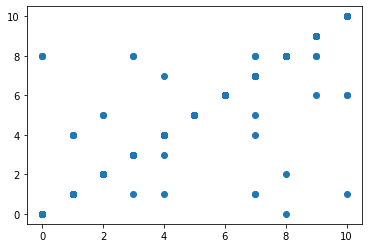

In [18]:
plt.scatter(tY_result,tZ_result)

In [19]:
tZ_resultc = []
for tj in range(tN):
    if tZ_result[tj]==0:
        tZ_resultc.append('no_object')
    elif tZ_result[tj]==1:
        tZ_resultc.append('small10cm')
    elif tZ_result[tj]==2:
        tZ_resultc.append('small20cm')
    elif tZ_result[tj]==3:
        tZ_resultc.append('small30cm')
    elif tZ_result[tj]==4:
        tZ_resultc.append('medium10cm')
    elif tZ_result[tj]==5:
        tZ_resultc.append('medium20cm')
    elif tZ_result[tj]==6:
        tZ_resultc.append('medium30cm')
    elif tZ_result[tj]==7:
        tZ_resultc.append('large10cm')
    elif tZ_result[tj]==8:
        tZ_resultc.append('large20cm')
    elif tZ_result[tj]==9:
        tZ_resultc.append('large30cm')
    elif tZ_result[tj]==10:
        tZ_resultc.append('large50cm')
    else:
        tZ_resultc.append('unknown')
tZ_resultc

['large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large20cm',
 'large20cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'large10cm',
 'small10cm',
 'small10cm',
 'large10cm',
 'large10cm',
 'medium20cm',
 'medium10cm',
 'large10cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'no_object',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'large20cm',
 'small20cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'medium30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'large20cm',
 'large30cm',
 'large30cm',
 'large30cm',
 'l

In [20]:
tferrorp = str((tY_result!=tZ_result).sum()*100/tY_result.size)+' %'
tferrorp

'10.545454545454545 %'

In [21]:
tfaccuracyp = str((tY_result==tZ_result).sum()*100/tY_result.size)+' %'
tfaccuracyp

'89.45454545454545 %'